# Airbmb Open Dataset Analysis

The main questions answered in this analysis of Airbnb Boston
 - Do you have a better experience (based on reviews) when you pay more? 
 - What attributes on the listing correlate with price the most? 
 - What are the most expensive and least expensive neighborhoods? 

In [1]:
#Import Needed Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# Import Data

In [2]:
path = os.getcwd()
reviews = pd.read_csv(path+'\\reviews.csv')
calendar = pd.read_csv(path+'\\calendar.csv')
listings = pd.read_csv(path+'\\listings.csv')

In [3]:
#Look at the size of the datasets
print(reviews.shape)
print(calendar.shape)
print(listings.shape)

(68275, 6)
(1308890, 4)
(3585, 95)


The listings dataset looks to be the most features rich with 95 columns

In [4]:
#Update pandas settings for visibility
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Let's take a peak at the data

In [5]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


# Data Exploration and Preparation

In [8]:
#Let's see what data types we will be working with
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

Looking at string / object values that might need to be convered to a numeric

In [9]:
#Filter to only string / object data types to make the list easier to review
mylist = list(listings.select_dtypes(include=['object']).columns)
mylist

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',

Identified a couple columns as string / objectgs that need to be cleaned and converted
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'host_response_rate',
 'host_acceptance_rate'

In [10]:
#Look at the discriptive statistics for each dataset
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [11]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [12]:
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [13]:
#Funtion to see how many missing values are in each colum of a dataframe --- accounts for any columns that have atleast 1 missing value

def missing_rates(df):
    print((df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100)

In [14]:
#Applying the missing data rates fuction to the listings dataset
missing_rates(listings)

summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.083682
bathrooms  

In [15]:
#Applying the missing data rates fuction to the calendar dataset
missing_rates(calendar)

price    50.871578
dtype: float64


In [16]:
#Applying the missing data rates fuction to the reviews dataset
missing_rates(reviews)

comments    0.077627
dtype: float64


Most of the value in the data seems to be contained within the listings data, so that's were the main focus will be.

# Refine Dataset to Only Desired Columns and Clean

Let's make the dataset more manageable by only looking over the columns that we will be using for our analysis.

In [17]:
cols = ['id','price','number_of_reviews','first_review','last_review','reviews_per_month','review_scores_rating',
'review_scores_value','property_type','room_type','accommodates','bathrooms','bedrooms','beds','neighbourhood_cleansed']

In [18]:
#Our new dataframe we will use for analysis is df by making a copy of selected columns from the listings data

df = listings[cols].copy()

In [19]:
#Let's make sure all of the columns we want are here
df.head()

,id,price,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_value,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed
0,12147973,$250.00,0,NaN,NaN,NaN,NaN,NaN,House,Entire home/apt,4,1.5,2.0,3.0,Roslindale
1,3075044,$65.00,36,2014-06-01,2016-08-13,1.30,94.0,9.0,Apartment,Private room,2,1.0,1.0,1.0,Roslindale
2,6976,$65.00,41,2009-07-19,2016-08-05,0.47,98.0,10.0,Apartment,Private room,2,1.0,1.0,1.0,Roslindale
3,1436513,$75.00,1,2016-08-28,2016-08-28,1.00,100.0,10.0,House,Private room,4,1.0,1.0,2.0,Roslindale
4,7651065,$79.00,29,2015-08-18,2016-09-01,2.25,99.0,10.0,House,Private room,2,1.5,1.0,2.0,Roslindale


In [20]:
#Convert Dates to Datetime in pandas 
df['first_review'] =  pd.to_datetime(df['first_review'])
df['last_review'] =  pd.to_datetime(df['last_review'])

#Creating a column as a feature of how long since first and last review
df['ReviewsTimespan'] = (df['last_review'] - df['first_review']).dt.days

I am curious to see if the duration from the first to last review will have any strong corrlations to other columns

In [21]:
# To work with price we need to convert the price column into a numeric data type

# Here is a function that will remove the first character (which after looking at teh column is '$') and then we replace all commas with a blank.
# We need to do this so that pandas will recognize this as a numeric

def convert_price(x):
    x = float(x[1:].replace(',',''))
    return x

#Apply the price conversion function to our dataframe (df)
df['price'] = df['price'].apply(lambda x: convert_price(x))

While reviewing the data some very likely usefull columns are text categorical  columns. So instead of converting these into a dummy datadata (where each possible value would get a new column) I thought it would be more benifical to rank the values numberically to see if there is a relation to other numeric columns. 

# Encoding of some of the data

Let's see how many values and how many occurances there are in the dataframe.  To do this we will use the value counts function

In [22]:
listings['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [23]:
listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

Good news here! There are not that many values we will need to encode.  We will be doing this manually as opposed to doing one hot encoding so we can control the new value to specific text values.  This will allow us to rank the text values how we see fit as opposed to randomly were any correlations would be rended meaningless. 
 
The encodings below are representative of my interpration of value to an enduser going from lowest to greatest.  

In [24]:
# Replacing Values for room_type

df.replace({'Entire home/apt': 0, 
                       'Shared room':1, 
                       'Private room':2}, inplace=True)

In [25]:
# Replacing Values for property_type

df.replace({'Camper/RV':0,
 'Apartment':1,
 'Bed & Breakfast':2,
 'Boat':3,
 'Condominium':4,
 'Dorm':5,
 'Entire Floor':6,
 'Guesthouse':7,
 'House':8,
 'Loft':9,
 'Townhouse':10,
 'Villa':11,
 'Other':12}, inplace=True)

Now let's make sure the 2 columns we did the value replacements are now recoginized as numerics. 

In [26]:
df.dtypes

id                                 int64
price                            float64
number_of_reviews                  int64
first_review              datetime64[ns]
last_review               datetime64[ns]
reviews_per_month                float64
review_scores_rating             float64
review_scores_value              float64
property_type                    float64
room_type                          int64
accommodates                       int64
bathrooms                        float64
bedrooms                         float64
beds                             float64
neighbourhood_cleansed            object
ReviewsTimespan                  float64
dtype: object

Great! Looks like all of the columns we wanted as numerics are all properly converted and encoded.

# Model and Evaluation of Data -- Time To Dig Into The Data

In [27]:
#Let's take a peak at our newly shaped and converted dataframe that's ready for analysis

df.head(10)

,id,price,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_value,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,ReviewsTimespan
0,12147973,250.0,0,NaT,NaT,NaN,NaN,NaN,8.0,0,4,1.5,2.0,3.0,Roslindale,NaN
1,3075044,65.0,36,2014-06-01,2016-08-13,1.30,94.0,9.0,1.0,2,2,1.0,1.0,1.0,Roslindale,804.0
2,6976,65.0,41,2009-07-19,2016-08-05,0.47,98.0,10.0,1.0,2,2,1.0,1.0,1.0,Roslindale,2574.0
3,1436513,75.0,1,2016-08-28,2016-08-28,1.00,100.0,10.0,8.0,2,4,1.0,1.0,2.0,Roslindale,0.0
4,7651065,79.0,29,2015-08-18,2016-09-01,2.25,99.0,10.0,8.0,2,2,1.5,1.0,2.0,Roslindale,380.0
5,12386020,75.0,8,2016-04-20,2016-08-28,1.70,100.0,10.0,4.0,2,2,1.0,1.0,1.0,Roslindale,130.0
6,5706985,100.0,57,2015-07-08,2016-09-01,4.00,90.0,9.0,1.0,0,3,1.0,1.0,2.0,Roslindale,421.0
7,2843445,75.0,67,2014-05-18,2016-09-04,2.38,96.0,10.0,8.0,2,2,2.0,1.0,1.0,Roslindale,840.0
8,753446,58.0,65,2015-09-10,2016-08-30,5.36,96.0,10.0,4.0,2,2,1.0,1.0,2.0,Roslindale,355.0
9,849408,229.0,33,2014-01-02,2016-05-27,1.01,94.0,9.0,1.0,0,5,1.0,2.0,2.0,Roslindale,876.0


In [28]:
df.describe()

,id,price,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_value,property_type,room_type,accommodates,bathrooms,bedrooms,beds,ReviewsTimespan
count,3.585000e+03,3585.000000,3585.000000,2829.000000,2772.000000,2764.000000,3582.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,2829.000000
mean,8.440875e+06,173.925802,19.044630,1.970908,91.916667,9.168234,2.610832,0.791074,3.041283,1.221647,1.255944,1.609060,352.958643
std,4.500787e+06,148.331321,35.571658,2.120561,9.531686,1.011116,2.899581,0.966590,1.778929,0.501487,0.753060,1.011745,430.249403
min,3.353000e+03,10.000000,0.000000,0.010000,20.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.679319e+06,85.000000,1.000000,0.480000,89.000000,9.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,35.000000
50%,8.577620e+06,150.000000,5.000000,1.170000,94.000000,9.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,194.000000
75%,1.278953e+07,220.000000,21.000000,2.720000,98.250000,10.000000,4.000000,2.000000,4.000000,1.000000,2.000000,2.000000,489.000000
max,1.493346e+07,4000.000000,404.000000,19.150000,100.000000,10.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,2680.000000


For price, we see that 75% of all prices are 220, but the max is 4000.  This looks like a significant outlier in the data at it about 27x the price's standard devation.  

# Question 1: Do you have a better experience when the price is higher?

Let's see what the how many listings and number of monthly reviews there are at differnt price tiers

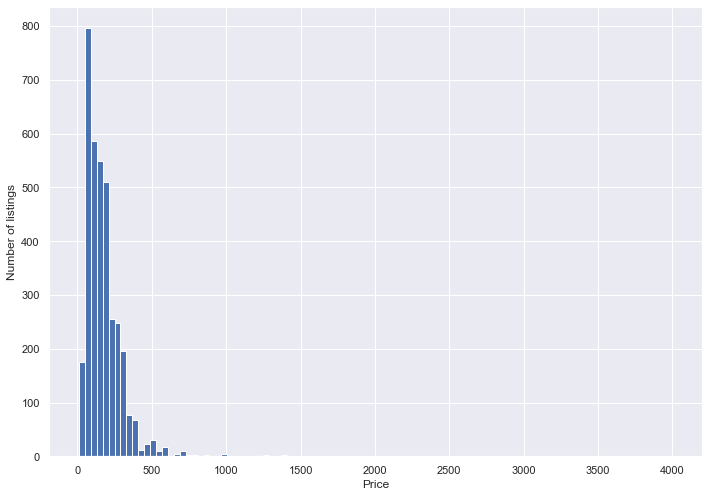

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df['price'].hist(bins=100); 
plt.xlabel('Price');
plt.ylabel('Number of listings');

The vast majority of listings seem to be towards the lower end of the price spectrum

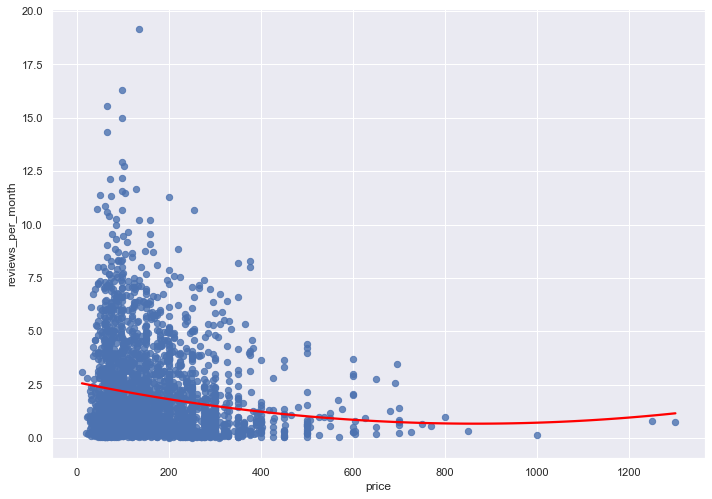

In [43]:
ax = sns.regplot(x="price", y="reviews_per_month", data=df, scatter_kws={"s": 40},line_kws={"color": "red"}, order=2, ci=None, truncate=True)

We do see that as price increases there is a exponential decreate in number of reviews. This makes sense as we saw above that the number of listings greatly diminish as price increases.  Thus there are far fewer listigns that could be reviewed.

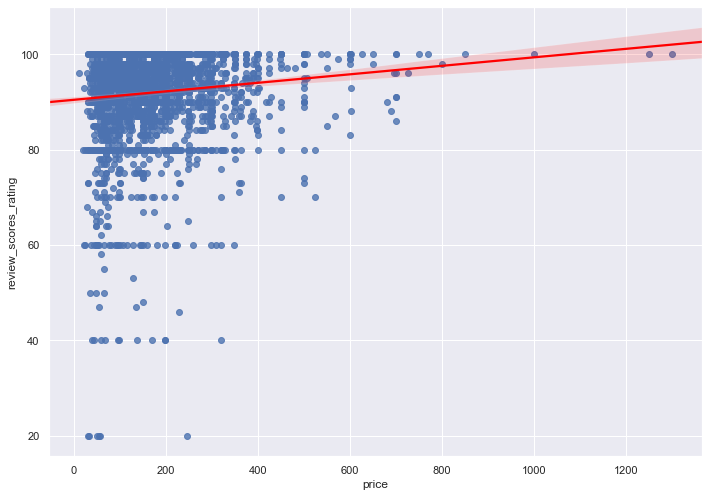

In [44]:
#Let's look at how the averate reviews rating compares to price.

ax = sns.regplot(x="price", y="review_scores_rating", data=df, line_kws={"color": "red"})

We can see that there is indeed a postive linear trend to review rating and price. But let's keep diving in! 

In [32]:
#Let's see the discriptive stateistics for just price

df['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [33]:
# Let's creating bins for the price per listing based on the 25%,50%, 75%, and max for price. This will allow us to more
# easily identify trends between price and reviews rating. 

bins = [10, 85, 150, 220, 4000]
labels =[1,2,3,4]
df['binnedPrice'] = pd.cut(df['price'], bins,labels=labels)

#Let's print this out to make sure the bins were created
df.head(10)

,id,price,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_value,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,ReviewsTimespan,binnedPrice
0,12147973,250.0,0,NaT,NaT,NaN,NaN,NaN,8.0,0,4,1.5,2.0,3.0,Roslindale,NaN,4
1,3075044,65.0,36,2014-06-01,2016-08-13,1.30,94.0,9.0,1.0,2,2,1.0,1.0,1.0,Roslindale,804.0,1
2,6976,65.0,41,2009-07-19,2016-08-05,0.47,98.0,10.0,1.0,2,2,1.0,1.0,1.0,Roslindale,2574.0,1
3,1436513,75.0,1,2016-08-28,2016-08-28,1.00,100.0,10.0,8.0,2,4,1.0,1.0,2.0,Roslindale,0.0,1
4,7651065,79.0,29,2015-08-18,2016-09-01,2.25,99.0,10.0,8.0,2,2,1.5,1.0,2.0,Roslindale,380.0,1
5,12386020,75.0,8,2016-04-20,2016-08-28,1.70,100.0,10.0,4.0,2,2,1.0,1.0,1.0,Roslindale,130.0,1
6,5706985,100.0,57,2015-07-08,2016-09-01,4.00,90.0,9.0,1.0,0,3,1.0,1.0,2.0,Roslindale,421.0,2
7,2843445,75.0,67,2014-05-18,2016-09-04,2.38,96.0,10.0,8.0,2,2,2.0,1.0,1.0,Roslindale,840.0,1
8,753446,58.0,65,2015-09-10,2016-08-30,5.36,96.0,10.0,4.0,2,2,1.0,1.0,2.0,Roslindale,355.0,1
9,849408,229.0,33,2014-01-02,2016-05-27,1.01,94.0,9.0,1.0,0,5,1.0,2.0,2.0,Roslindale,876.0,4


Now that we have bin's assigned to each listing id, let's group all of the listings by their binnded price label which we created above.  Then lets look at the mean of that and set our binned price id as the index.

In [34]:
binndedreviews = df.groupby(['binnedPrice']).mean()
binndedreviews['binndedprice'] = binndedreviews.index
binndedreviews[['review_scores_rating']]

,review_scores_rating
binnedPrice,
1,90.092643
2,92.120948
3,92.814114
4,92.914504


Looks like there is definitiyly a trend, though it's rather small going from 90.09 to 92.9 -- but a trend none the less.  Let's create a plot of this to better visualize it!

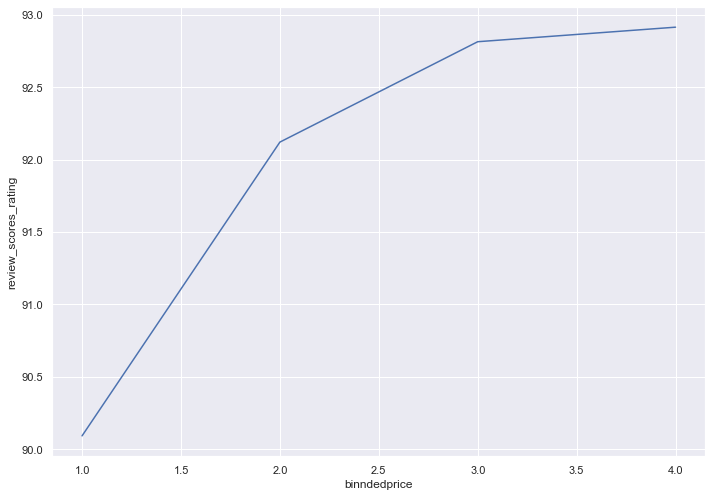

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='binndedprice', y='review_scores_rating', data=binndedreviews)

Findings:  Price does on average tend to yeild a better overall experiance.  

# Question 2: What Features Correlate Most To Price

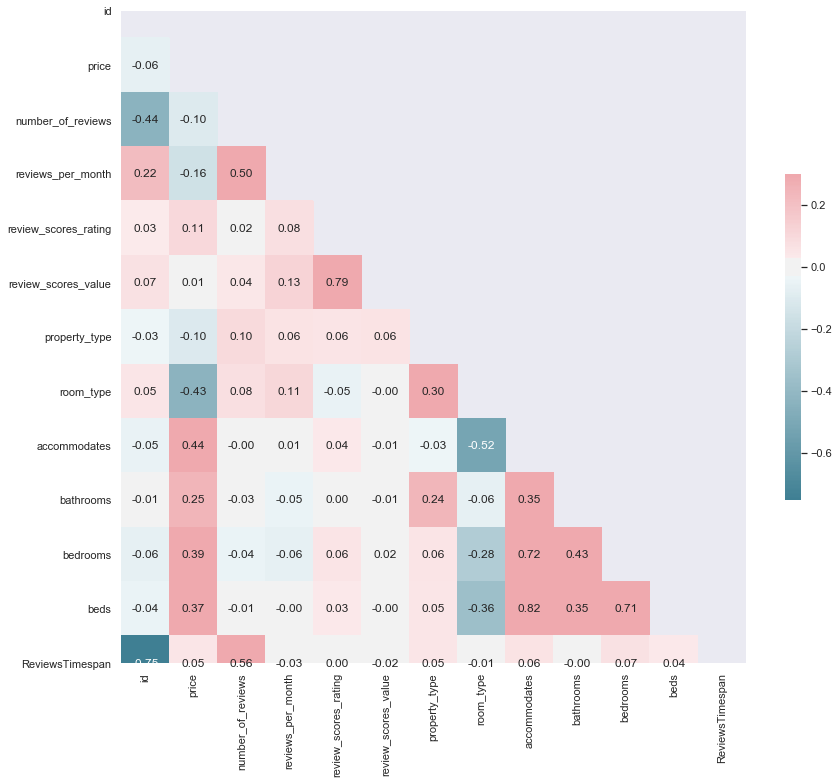

In [36]:
# Create and Review Correlation Matrix
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt = '.2f', cbar_kws={"shrink": .5})

Let's just look over the values now without the plot

In [37]:
corr = df.corr()['price']
corr.sort_values(ascending=False)

price                   1.000000
accommodates            0.437756
bedrooms                0.385298
beds                    0.370013
bathrooms               0.248234
review_scores_rating    0.105651
ReviewsTimespan         0.046260
review_scores_value     0.011834
id                     -0.059198
number_of_reviews      -0.096427
property_type          -0.099305
reviews_per_month      -0.157016
room_type              -0.430358
Name: price, dtype: float64

We can see that the most influential attributes on the listing to affect price are:
- Accommodates -- How Many People Can Accommodate the Listing
- Room Type
- Bedroom Count


# Question 3: What are the most / least expensive neighborhoods?

Let's look at a couple of plots to see how the neighbourhoods compare.  We will create a box plot to see the mean and distributions of each neighghood then to see a more simple and clear picture we will look at a simple bar graph showing the mean price for each neighborhood.

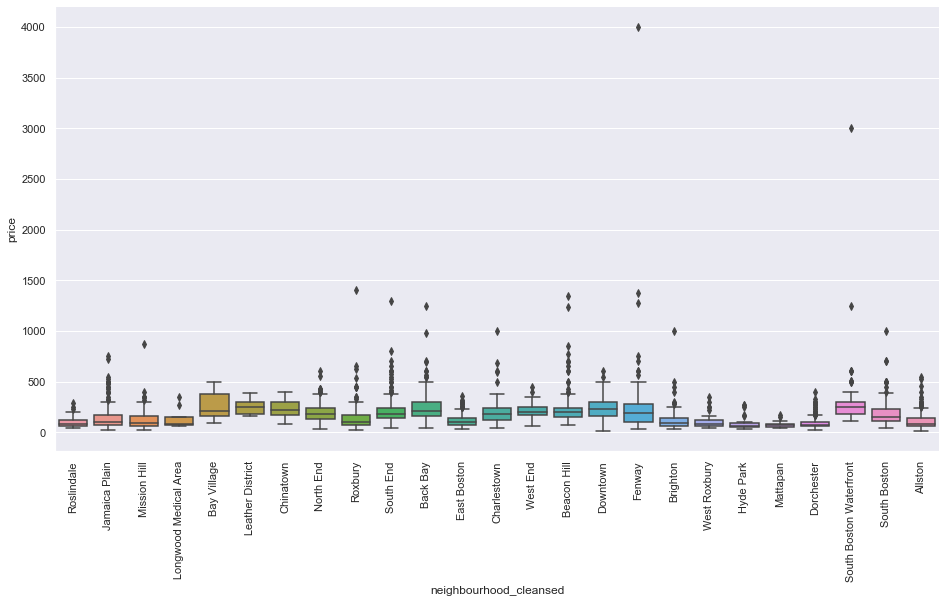

In [38]:
g = sns.catplot(x="neighbourhood_cleansed", y="price", kind="box",  data=df, height=7, aspect=1.9);
g.set_xticklabels(rotation=90)

Now let's create the bar graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

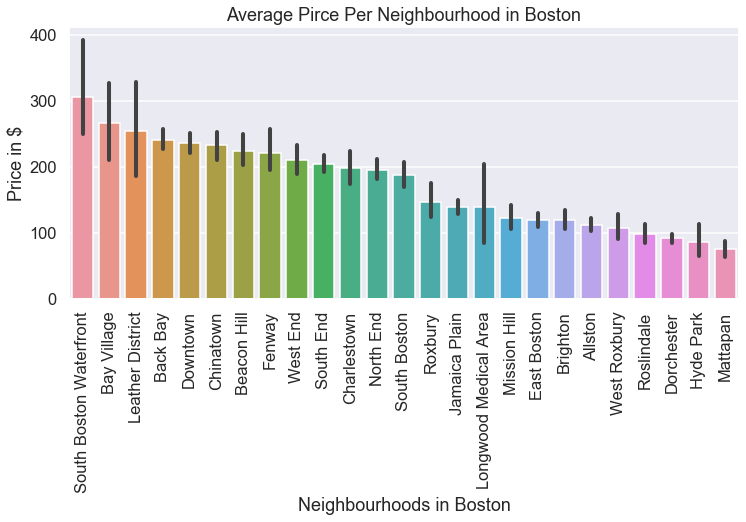

In [47]:
sort = df.groupby(["neighbourhood_cleansed"])['price'].mean().sort_values(ascending=False)
sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
plot_price_place = sns.barplot(x='neighbourhood_cleansed', y='price', data=df, order=sort.index)
axes.set_xlabel('Neighbourhoods in Boston')
axes.set_ylabel('Price in $')
axes.set_title("Average Pirce Per Neighbourhood in Boston")
plt.xticks(rotation=90)

In [40]:
neighbourhoodprices = df.groupby('neighbourhood_cleansed').mean()
neighbourhoodprices[['price','review_scores_rating']].sort_values(by='price',ascending=False)

,price,review_scores_rating
neighbourhood_cleansed,,
South Boston Waterfront,306.060241,94.431034
Bay Village,266.833333,93.000000
Leather District,253.600000,98.333333
Back Bay,240.950331,91.531646
Downtown,236.459302,92.432203
Chinatown,232.352113,92.121951
Beacon Hill,224.443299,93.378698
Fenway,220.393103,89.417112
West End,209.591837,90.333333


Here we can see the most expensive neighborhood is the South Boston Waterfront and the least expensive is Mattapan

# The Results

Question 1: Do you have a better experience (based on reviews) when you pay more?
- Yes we do see a correlation between price and review rating.
Question 2: What attributes on the listing correlate with price the most?
- Accommodates -- How Many People Can Accommodate the Listing
- Room Type
- Bedroom Count
Question 3: What are the most expensive and least expensive neighborhoods?
- The most expensive is South Boston Waterfront
- The least expensive is Mattapan


# BONUS: See the relationship between mean price and review rating per neighbhood

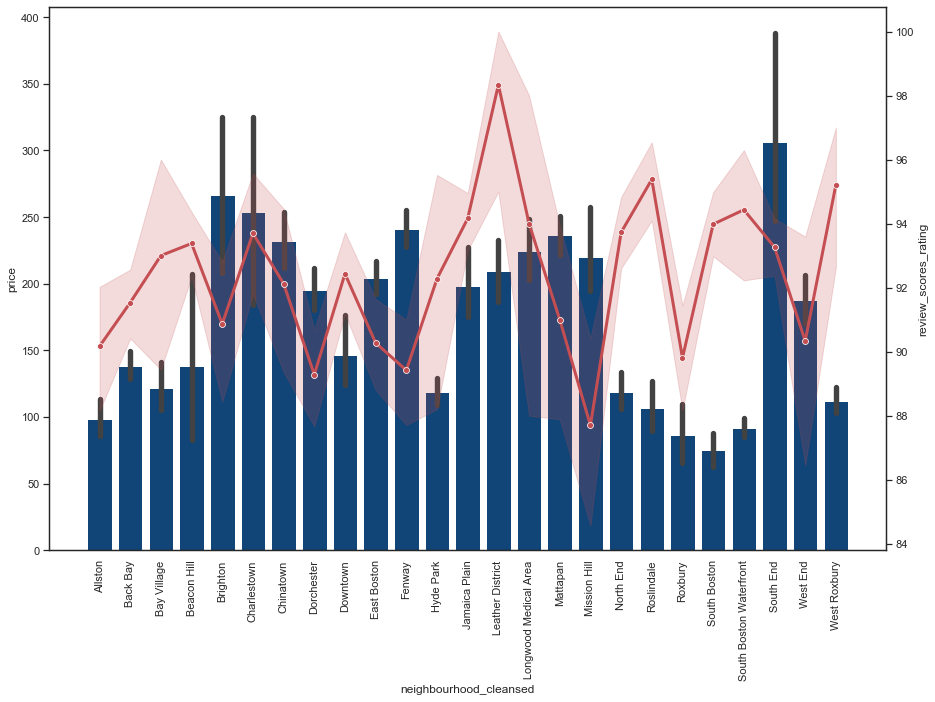

In [41]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.barplot(x='neighbourhood_cleansed',
            y='price', 
            color='#004488',
            data=df,
            ax=ax1)
sns.lineplot(x='neighbourhood_cleansed', 
             y='review_scores_rating',
             color='r',
             marker="o",
             data=df,
             ax=ax2)
plt.show()
sns.set()